In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import re
import nltk

from nltk.corpus import stopwords
import string
 
from wordcloud  import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#reading .csv file
data=pd.read_csv("C:\\Users\\admin\\Desktop\\UpdatedResumeDataSet.csv")
data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [2]:
print(data['Category'].unique())
print("total unique category: {}".format(len(data['Category'].unique())))

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']
total unique category: 25


In [3]:
print(data['Category'].value_counts())

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


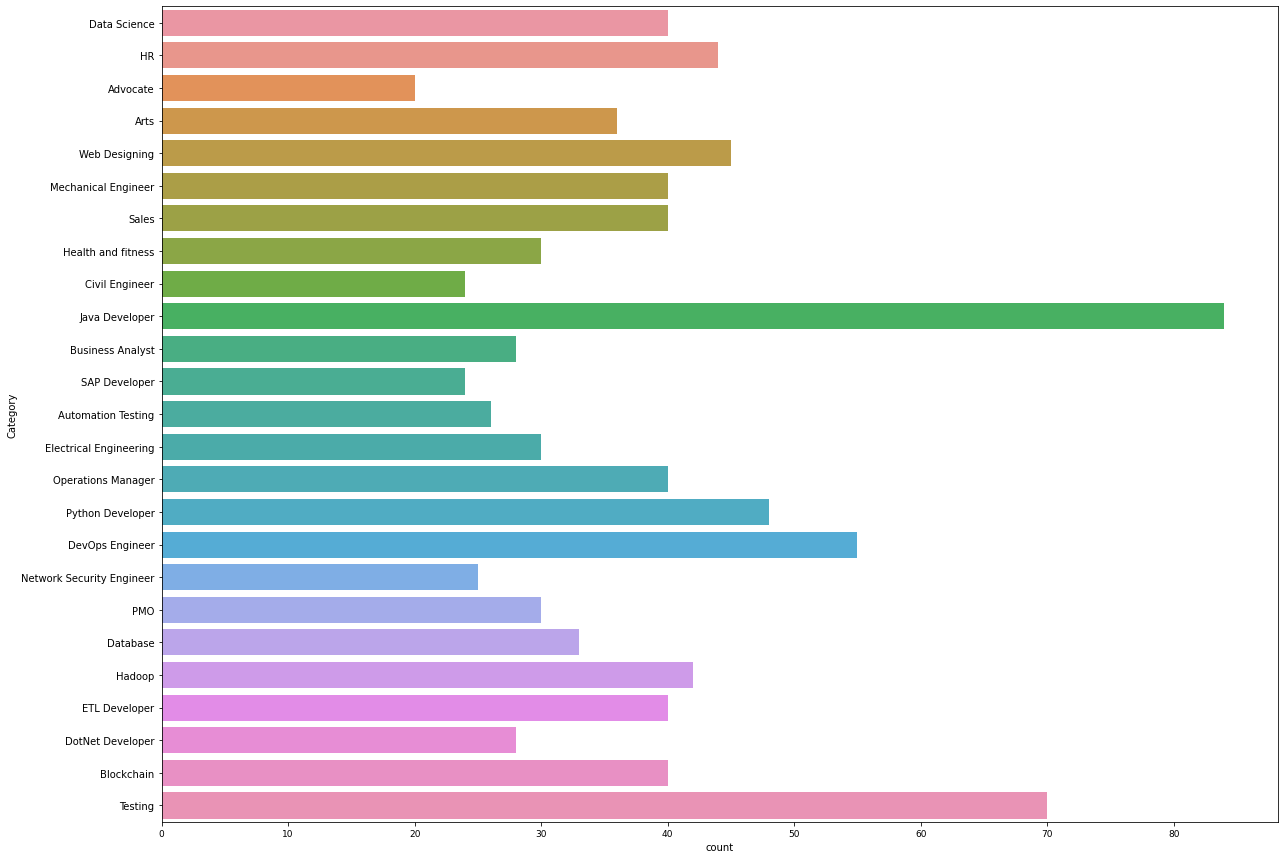

In [4]:
#plotting graph
#fix grapgh size (20,15)
plt.rcParams["figure.figsize"] = (20, 15)
plt.rcParams["xtick.labelsize"] = 9
sns.countplot(y="Category",data=data)
plt.show()

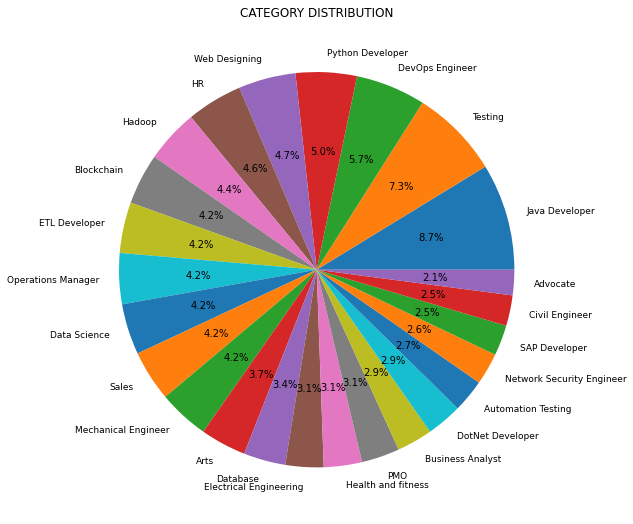

In [5]:
#plotting pie chart
targetCounts = data['Category'].value_counts()
targetLabels  = data['Category'].value_counts().keys()
# Make square figures and axes
plt.figure(1, figsize=(20,20))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%',)


In [6]:
#defining cleaning function
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
data['cleaned_resume'] = data.Resume.apply(lambda x: cleanResume(x))

In [7]:
data


,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,Testing,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [9]:
stopwords=set(stopwords.words('english')+['``',"''"])  #stopwords include coomon words like at tere, theirs mine,etc
total_words=[]
sentences=data['Resume'].values
cleansentences=''
for i in range(0,200):
    text=cleanResume(sentences[i])
    cleansentences+=text
    words=nltk.word_tokenize(text)            #tokenize->changing to smallest individua unit
    for word in words:
        if word not in stopwords and word not in string.punctuation:    
            total_words.append(word)
word_freq_dist=nltk.FreqDist(total_words)

#finding most common words
most_common=word_freq_dist.most_common(100)
print(most_common)
         
    # if the resume have these words then probability of selection is incresed

[('Details', 609), ('Exprience', 580), ('months', 478), ('company', 459), ('description', 427), ('1', 384), ('Project', 269), ('year', 261), ('January', 253), ('Maharashtra', 244), ('6', 225), ('Less', 224), ('data', 223), ('project', 212), ('Skill', 206), ('Data', 203), ('Web', 196), ('application', 192), ('Education', 177), ('I', 174), ('time', 169), ('College', 168), ('Python', 156), ('Science', 154), ('Pune', 154), ('Used', 152), ('Software', 151), ('Engineering', 147), ('The', 146), ('University', 140), ('like', 139), ('Nagpur', 138), ('C', 137), ('SQL', 136), ('monthsCompany', 134), ('Roles', 134), ('B', 132), ('Responsibility', 130), ('developed', 128), ('Technologies', 127), ('2', 123), ('India', 122), ('Designed', 121), ('website', 120), ('Machine', 118), ('UI', 117), ('Learning', 116), ('Developer', 116), ('Mumbai', 115), ('using', 114), ('24', 111), ('Database', 110), ('development', 105), ('Description', 103), ('Responsibilities', 100), ('S', 100), ('A', 99), ('BOOTSTRAP', 

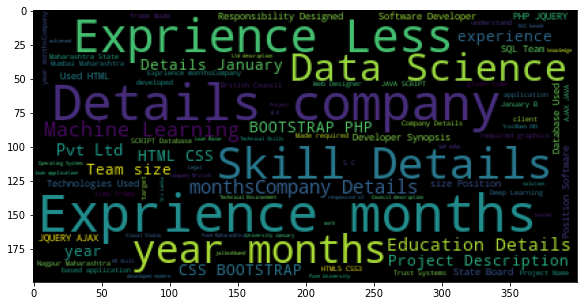

In [10]:
wc=WordCloud().generate(cleansentences)
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["xtick.labelsize"] = 10
plt.imshow(wc)

In [11]:
#from sklearn.preprocessing import LabelEncoder
#var = ['Category']
#le = LabelEncoder()
#for i in var:
    #data[i] = le.fit_transform(data[i])


In [12]:
data

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,Testing,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [13]:
text=data['cleaned_resume'].values
target=data['Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(text)
WordFeatures = word_vectorizer.transform(text)
data

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,Testing,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [14]:
#spliiting data in two: for training model and one for prediction
x_train,x_test,y_train,y_test= train_test_split(WordFeatures,target,random_state=0, test_size=0.2)
print(x_train.shape)
print(x_test.shape)

#using One Vs Rest with K neighbours
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train, y_train)

prediction =  clf.predict(x_test)
print(prediction)

(769, 1500)
(193, 1500)
['Python Developer' 'Health and fitness' 'Data Science'
 'Network Security Engineer' 'Java Developer' 'Health and fitness'
 'ETL Developer' 'Health and fitness' 'Java Developer'
 'Electrical Engineering' 'Data Science' 'Testing' 'Business Analyst'
 'Electrical Engineering' 'Hadoop' 'Business Analyst' 'PMO'
 'DevOps Engineer' 'DevOps Engineer' 'DotNet Developer' 'HR'
 'Electrical Engineering' 'Network Security Engineer' 'Sales' 'PMO'
 'Mechanical Engineer' 'Civil Engineer' 'DevOps Engineer' 'Blockchain'
 'Civil Engineer' 'Python Developer' 'Operations Manager' 'Sales'
 'Database' 'Testing' 'Testing' 'Sales' 'Operations Manager' 'Database'
 'Python Developer' 'ETL Developer' 'Python Developer'
 'Health and fitness' 'DevOps Engineer' 'Java Developer' 'Java Developer'
 'DevOps Engineer' 'Electrical Engineering' 'Business Analyst' 'Sales'
 'Arts' 'Web Designing' 'Health and fitness' 'Java Developer' 'Sales'
 'Testing' 'DevOps Engineer' 'Java Developer' 'Blockchain'
 

In [15]:
#checking accuracy
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))
print("n Classification report for classifier %s:\n %s \n" % (clf, metrics.classification_report( y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99
n Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
                            precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         3
       Automation Testing       1.00      0.80      0.89         5
               Blockchain       1.00      1.00      1.00         9
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       0.83      1.00      0.91         5
             Data Science       1.00      1.00      1.00         9
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         9
            ETL Developer       1.00      1.00      1.00   

In [16]:
prediction =  clf.predict(WordFeatures[961])
print(prediction)

['Testing']
